<a href="https://colab.research.google.com/github/ChickenRob0t/Homework-classes/blob/Dynamic-Systems-and-Chaos/T_2_Os_Acoplado/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
#Parte 1
q0=5 
v0=10 
w=4
m=30

n=1 #Sistema q_0,v_0


In [ ]:
def giro(q_a,v_a,t_0,t_f,m): 
  x_0=np.append(q_a,v_a)
  w_m=[[0,1],[-w**2,0]]
  I=np.eye(n)
  A=np.kron(w_m,I) 
  
  
  def RHS(x,t):
    return np.matmul(A,x)

  t=np.linspace(t_0,t_f,m)   
  x=odeint(RHS,x_0,t)
  return x

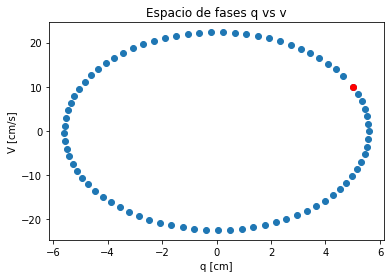

In [ ]:
#Ploteo de la primera
x=giro(q0,v0,0,1.538,80)

plt.plot(x[:,0],x[:,1],'o')
plt.plot(q0,v0,'o',c='r')
plt.ylabel('V [cm/s]')
plt.xlabel('q [cm]')
plt.title('Espacio de fases q vs v')
plt.savefig('98.png',dpi=200)

In [ ]:
#Parametrización del círculo
n=15
m=30
r=5
s=np.linspace(0,2*np.pi,n)
q_ac=r*np.cos(s)+10
v_ac=r*np.sin(s)+10

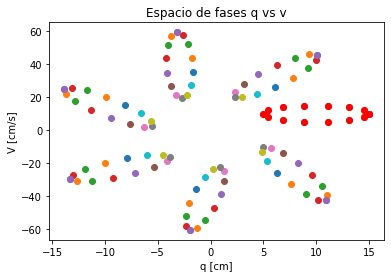

In [ ]:
x=giro(q_ac,v_ac,0,1.4,7)
plt.plot(x[:,:n],x[:,n:],'o')
plt.plot(q_ac,v_ac,'o',color='r')
plt.ylabel('V [cm/s]')
plt.xlabel('q [cm]')

plt.title('Espacio de fases q vs v')
plt.savefig('Circ.png',dpi=200)

In [ ]:
alpha=0.5
w1=np.pi
w2=np.pi*6
m1=3
m2=5
q_a=[8,20]
v_a=[10,15]

In [ ]:
def giro_2(q_a,v_a,t_0,t_f,m,alpha):
  x_0=np.append(q_a,v_a)
  zero_m=np.zeros((4,4))
  
  def RHS_2(x,t):
    w_m=[[-w1**2, -2*alpha/m1 *x[0]*x[1]],[-2*alpha/m2 *x[0]*x[1], -w2**2]]
    zero_m[2:,:2]=w_m
    zero_m[:2,2:]=np.eye(2,2)

    return np.matmul(zero_m,x)

  t=np.linspace(t_0,t_f,m)
  return odeint(RHS_2,x_0,t)

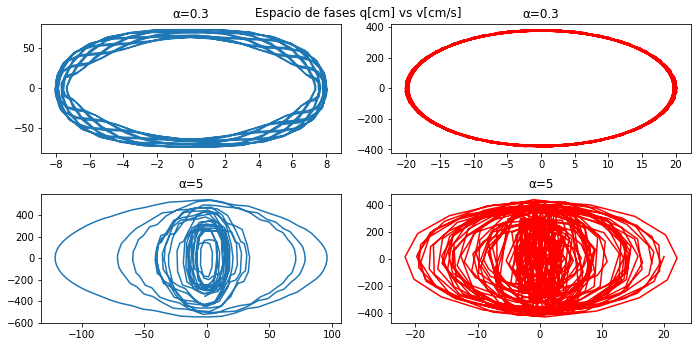

In [ ]:
x=giro_2(q_a,v_a,0,10,500,0.5)
#Ploteo 
fig, axs= plt.subplots(2, 2, figsize=(10, 5))

fig.suptitle('Espacio de fases q[cm] vs v[cm/s]')
fig.tight_layout(pad=2.0)

axs[0,0].set_title('α=0.3')
axs[0,0].plot(x[:,0],x[:,2])


axs[0,1].plot(x[:,1],x[:,3],color='r')
axs[0,1].set_title('α=0.3')

x=giro_2(q_a,v_a,0,10,500,5)
axs[1,0].set_title('α=5')
axs[1,0].plot(x[:,0],x[:,2])


axs[1,1].set_title('α=5')
axs[1,1].plot(x[:,1],x[:,3],color='r')

plt.savefig('caos.png',dpi=200)

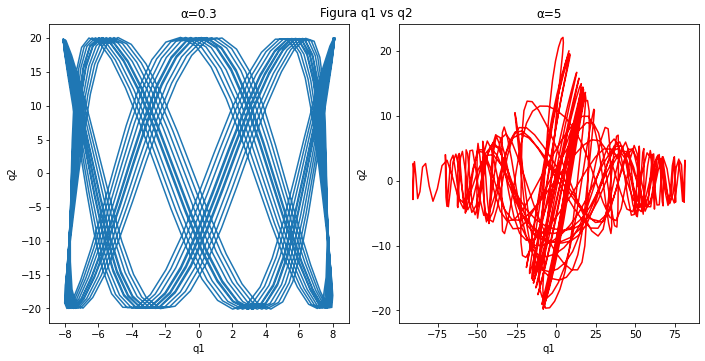

In [ ]:

x=giro_2(q_a,v_a,0,15,900,0.3)
fig, axs= plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Figura q1 vs q2')
fig.tight_layout(pad=2.0)

axs[0].set_title('α=0.3')
axs[0].plot(x[:,0],x[:,1])
axs[0].set_ylabel('q2')
axs[0].set_xlabel('q1')

x=giro_2(q_a,v_a,0,10,900,5)
axs[1].plot(x[:,0],x[:,1],color='r')
axs[1].set_title('α=5')
axs[1].set_ylabel('q2')
axs[1].set_xlabel('q1')

plt.savefig('ultimo.png',dpi=200)